<h1> <center> Sales Analysis with Pandas

<h2> OBJECTIVE

- What is the overall sales trend?
- Which are the Top 10 products by sales?
- Which are the Most Selling Products?
- Which is the most preferred Ship Mode?
- Which are the Most Profitable Category and Sub-Category?

<H4> IMPORTING REQUIRED LIBRARIES

In [1]:
# Data Manipulation
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h4> Importing Dataset

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

<h3> Data Auding

You can’t make your data work for you until you know what data you’re talking about.

To get a quick idea of what the data looks like, we can call the head function on the data frame. By default, this returns the top five rows, but it can take in a parameter of how many rows to return.

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [5]:
# shape of the dataset
df.shape

(51290, 21)

In [6]:
# Columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

This looks a lot like an Excel spreadsheet, doesn’t it? Under the hood, the data frame is a two-dimensional data structure and each column can have different types. To show that, we can call dtypes attribute on the data frame to see what each column types are.

In [7]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

Now we can do further analysis on our data to answer our questions. Before that, we should see if there are any missing values in our data set.To check if there are any missing values in the entire data set we use the isnull function, then see if there are any values.

We’re lucky we have such a nice data set and with no missing values. While we won’t focus on it in this post, a data scientist will spend their time cleaning (or wrangling ) the data. Since we don’t have any missing data, we can start doing further analysis on our data.

In [8]:
# Checking missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

Next, we can look at some descriptive statistics of the data frame with the describe method.

This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

- Row count, which aligns to what the shape attribute showed us.
- The mean, or average.
- The standard deviation, or how spread out the data is.
- The minimum and maximum value of each column
- The number of items that fall within the first, second, and third percentiles.

In [9]:
# Generating descriptive statistics summary
df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


<h3> EXPLORATORY DATA ANALYSIS

- <h4> WHAT IS THE OVERALL SALES TREND?

In [10]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [11]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [12]:
# Getting month year from order_date
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [13]:
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [17]:
df.groupby('month_year').sum()

,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
2011-01,98898.48886,1463,68.758,8321.80096,10544.78800,870763
2011-02,91152.15698,1224,52.252,12417.90698,10681.16300,760158
2011-03,145729.36736,1836,74.212,15303.56826,13096.18550,1083929
2011-04,116915.76418,2020,80.782,12902.32438,12954.52000,1134204
2011-05,146747.83610,2013,82.382,12183.82870,16443.20600,1138226
2011-06,215207.38022,3112,159.534,23415.24702,23813.10900,1844087
2011-07,115510.41912,1774,80.086,5585.00352,11844.47600,995445
2011-08,207581.49122,3035,121.462,23713.66772,22001.13600,1765658
2011-09,290214.45534,3707,137.678,35776.88394,29664.85100,2115572


In [25]:
# grouping month_year by sales
df_trend = df.groupby('month_year').sum()['sales'].reset_index().round()

In [26]:
df_trend

,month_year,sales
0,2011-01,98898.0
1,2011-02,91152.0
2,2011-03,145729.0
3,2011-04,116916.0
4,2011-05,146748.0
5,2011-06,215207.0
6,2011-07,115510.0
7,2011-08,207581.0
8,2011-09,290214.0
9,2011-10,199071.0


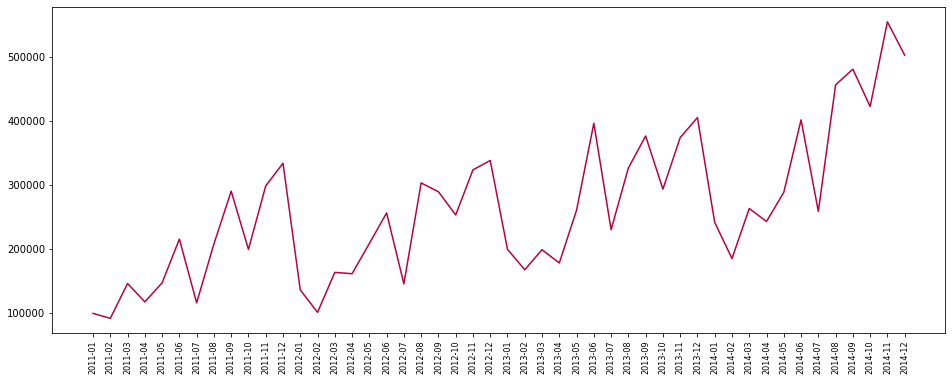

In [39]:
# Setting the figure size
plt.figure(figsize=(16,6))
plt.plot(df_trend['month_year'], df_trend['sales'], color='#b80045')    # x =  'month_year'   y = 'sales'
plt.xticks(rotation='vertical', size=8)
plt.show()

- <h4> WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [45]:
# Grouping products by sales
df.groupby('product_name').sum()['sales']

product_name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [54]:
# Converting to DataFrame
product_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [48]:
product_sales

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


In [55]:
# Sorting the dataframe in descending order
product_sales.sort_values(by=['sales'], inplace=True, ascending=False)

In [64]:
# Top 10 products by sales
product_sales[:10].round()

,sales
product_name,
"Apple Smart Phone, Full Size",86936.0
"Cisco Smart Phone, Full Size",76442.0
"Motorola Smart Phone, Full Size",73156.0
"Nokia Smart Phone, Full Size",71905.0
Canon imageCLASS 2200 Advanced Copier,61600.0
"Hon Executive Leather Armchair, Adjustable",58193.0
"Office Star Executive Leather Armchair, Adjustable",50662.0
"Harbour Creations Executive Leather Armchair, Adjustable",50122.0
"Samsung Smart Phone, Cordless",48653.0


- <h4> WHICH ARE THE MOST SELLING PRODUCTS?

In [66]:
# Grouping products by Quantity
df.groupby('product_name').sum()

,sales,quantity,discount,profit,shipping_cost,year
product_name,,,,,,
"""While you Were Out"" Message Book, One Form per Page",25.228,8,0.4,10.3880,3.10,6042
"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,0.4,16.7678,2.09,8052
#10 Self-Seal White Envelopes,108.682,10,0.2,52.1230,11.43,8053
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,0.4,223.1408,53.03,14088
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,0.8,115.2806,34.95,20124
...,...,...,...,...,...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660,24,0.4,115.6440,28.12,10064
iOttie HLCRIO102 Car Mount,215.892,12,0.8,-11.9940,51.19,10062
iOttie XL Car Mount,223.888,14,0.4,-50.3748,18.64,4028


In [72]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('product_name').sum() ['quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


- <h4> WHAT IS THE MOST PREFERRED SHIP MODE?

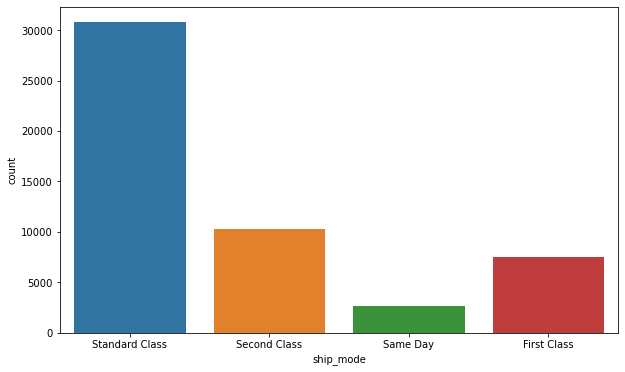

In [75]:
# Setting the figure size
plt.figure(figsize=(10,6))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data=df)

# Display the figure
plt.show()

- <h4> WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [76]:
df.groupby(['category', 'sub_category']).sum()

sales  quantity  discount        profit  \
category        sub_category                                                   
Furniture       Bookcases     1.466572e+06      8310   370.710  161924.41950   
                Chairs        1.501682e+06     12336   560.120  141973.79750   
                Furnishings   3.855783e+05     11225   478.880   46967.42550   
                Tables        7.570419e+05      3083   250.320  -64083.38870   
Office Supplies Appliances    1.011064e+06      6078   248.700  141680.58940   
                Art           3.720920e+05     16301   573.080   57953.91090   
                Binders       4.619115e+05     21429  1102.480   72449.84600   
                Envelopes     1.709043e+05      8380   320.810   29601.11630   
                Fasteners     8.324232e+04      8390   340.240   11525.42410   
                Labels        7.340403e+04      9322   313.890   15010.51200   
                Paper         2.442917e+05     12822   387.300   59207.68270   
                Storage       1.127086e+06     16917   700.490  108461.48980   
                Supplies      2.430742e+05      8543   310.200   22583.26310   
Technology      Accessories   7.492370e+05     10946   370.480  129626.30620   
                Copiers       1.509436e+06      7454   260.418  258567.54818   
                Machines      7.790601e+05      4906   252.000   58867.87300   
                Phones        1.706824e+06     11870   489.610  216717.00580   

                              shipping_cost      year  
category        sub_category                           
Furniture       Bookcases       155481.9670   4852847  
                Chairs          164229.3520   6911889  
                Furnishings      40746.7660   6380451  
                Tables           79861.3940   1732979  
Office Supplies Appliances      108300.5860   3532371  
                Art              41287.1420   9828413  
                Binders          48181.7120  12382700  
                Envelopes        18547.4880   4901146  
                Fasteners         9053.3380   4870955  
                Labels            8059.6750   5245285  
                Paper            26660.8450   7121179  
                Storage         120546.0320  10182612  
                Supplies         24811.5270   4881018  
Technology      Accessories      83513.3340   6189269  
                Copiers         159496.2049   4474471  
                Machines         79135.8485   2990958  
                Phones          184902.4920   6756800

In [85]:
# Grouping products by Category and Sub-Category
cat_subcat_profit = pd.DataFrame(df.groupby(['category', 'sub_category']).sum() ['profit'])

In [86]:
# Sorting the values
cat_subcat_profit.sort_values(['category','profit'], ascending=False).round()

profit
category        sub_category          
Technology      Copiers       258568.0
                Phones        216717.0
                Accessories   129626.0
                Machines       58868.0
Office Supplies Appliances    141681.0
                Storage       108461.0
                Binders        72450.0
                Paper          59208.0
                Art            57954.0
                Envelopes      29601.0
                Supplies       22583.0
                Labels         15011.0
                Fasteners      11525.0
Furniture       Bookcases     161924.0
                Chairs        141974.0
                Furnishings    46967.0
                Tables        -64083.0

<h1> <center>  ----- END -----